## Observations and Insights 

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import csv

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [73]:
# Checking the number of mice.
mouse_list = mouse_df["Mouse ID"]
print(f'There are {len(mouse_list.unique())} unique "Mouse IDs".')
mouse_list.value_counts()


There are 249 unique "Mouse IDs".


g989    13
p136    10
u327    10
w350    10
a492    10
        ..
n482     1
o848     1
h428     1
v199     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [74]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Add 'Duplicate_Check' column to mouse_df.  True = duplicated on 'Mouse ID' and 'Timepoint'.
mouse_df['Duplicate_Check'] = mouse_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)

# Create a df of duplicates ('duplicate_df')
duplicates = mouse_df['Duplicate_Check'].isin([True])
duplicate_df = mouse_df[duplicates]

# Check if there are multiple duplicates by create list of unique 'Mouse IDs' in duplicate_df
unique_dup_mice = duplicate_df["Mouse ID"].unique()
print(f'List of duplicate mice: {unique_dup_mice}')

# Store the "mouse_ID" of the duplicate in a variable
mouse_to_remove = unique_dup_mice[0]
print(f'"{mouse_to_remove}" is the only mouse with duplicate results. This mouse is to be removed from dataset.')



List of duplicate mice: ['g989']
"g989" is the only mouse with duplicate results. This mouse is to be removed from dataset.


In [75]:
# Optional: Get all the data for the duplicate mouse ID.

results_for_dup_mouse = mouse_df.loc[mouse_df['Mouse ID'] == mouse_to_remove]

results_for_dup_mouse_df = results_for_dup_mouse[['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]

results_for_dup_mouse_df.reset_index(drop=True, inplace=True)
results_for_dup_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [76]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
reduced_mouse_df = mouse_df.loc[mouse_df['Mouse ID'] != 'g989']

# remove Duplicate_Check column
reduced_mouse_df = reduced_mouse_df[['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]

In [77]:
# Checking the number of mice in the clean DataFrame.
reduced_mouse_list = reduced_mouse_df["Mouse ID"]
print(f'There are {len(reduced_mouse_list.unique())} unique "Mouse IDs".')

There are 248 unique "Mouse IDs".


## Summary Statistics

In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_statistics_df = reduced_mouse_df.groupby(["Drug Regimen"])

mean_results = summary_statistics_df["Tumor Volume (mm3)"].mean()
median_results = summary_statistics_df["Tumor Volume (mm3)"].median()
variance_results = summary_statistics_df["Tumor Volume (mm3)"].var()
std_dev_results = summary_statistics_df["Tumor Volume (mm3)"].std()
sem_results = summary_statistics_df["Tumor Volume (mm3)"].sem()

summary_statistics_output_df = pd.DataFrame(
    {"Mean": mean_results,
     "Median": median_results,
     "Variance": variance_results,
     "Std Dev": std_dev_results,
     "SEM": sem_results,
    }
)

summary_statistics_output_df.round(2)

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

mouse_summary_stats2 = reduced_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
mouse_summary_stats2.round(2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

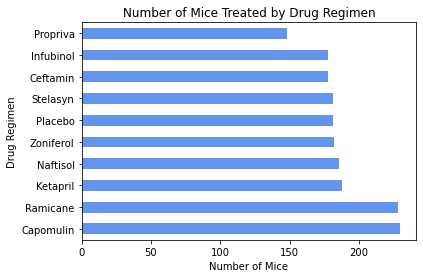

In [81]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

counts = reduced_mouse_df["Drug Regimen"].value_counts()

ax = counts.plot.barh(x='Regimen', y='count', rot=0, legend=False, title="Number of Mice Treated by Drug Regimen", color='cornflowerblue')
ax.set(xlabel="Number of Mice", ylabel="Drug Regimen")

plt.savefig("Mouse_Treatment_bar_chart_pandas.png")



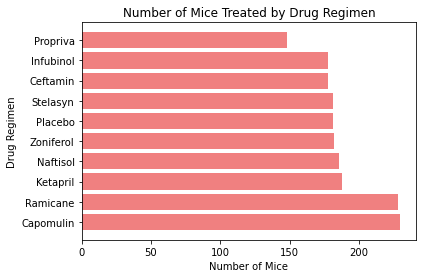

In [82]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.barh(counts.index, counts.values, color='lightcoral', alpha=1, align="center")

plt.title("Number of Mice Treated by Drug Regimen")
plt.xlabel("Number of Mice")
plt.ylabel("Drug Regimen")

plt.savefig("Mouse_Treatment_bar_chart_pyplot.png")


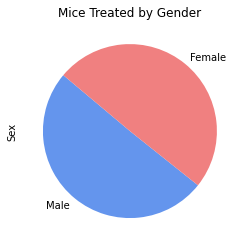

In [83]:
gender_data = reduced_mouse_df
gender_data = gender_data.drop_duplicates(subset="Mouse ID", keep='first')
gender_count = gender_data["Sex"].value_counts()

gender_count.plot(kind='pie', y='Count', x='Sex',
                                colors = ['cornflowerblue', 'lightcoral'],
                                title='Mice Treated by Gender',
                                startangle=140)

plt.savefig("Mouse_Treatment_pie_chart_pandas.png")


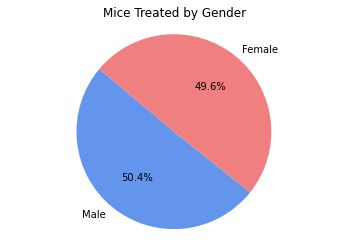

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_count, labels=["Male", "Female"], colors=['cornflowerblue', 'lightcoral'],
        autopct="%1.1f%%", startangle=140)

plt.axis("equal")
plt.title("Mice Treated by Gender");
plt.savefig("Mouse_Treatment_pie_chart_pyplot.png")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
